# ABOUT THE DATASET:  Amazon Fine Food Reviews

The **Amazon Fine Food Reviews** dataset contains reviews of fine foods from Amazon, spanning from October 1999 to October 2012. It includes over 568,000 reviews, provided by **256,059 users for 74,258 products**. The data includes product and user information, review text, and ratings (scores). A notable feature of the dataset is that it includes reviews from a variety of categories beyond fine foods. **There are also 260 users who have written more than 50 reviews.**
                                                                                                                                                                                                                                                            
                                                                                                                                                                                                                                    
 The Amazon Fine Food Reviews dataset contains the following columns:

- **Id**: Unique identifier for each review.
- **ProductId**: Identifier for the product being reviewed.
- **UserId**: Identifier for the user who wrote the review.
- **ProfileName**: Name of the user profile.
- **HelpfulnessNumerator**: Number of users who found the review helpful.
- **HelpfulnessDenominator**: Total number of users who voted on the helpfulness.
- **Score**: Rating given by the user (1 to 5).
- **Time**: Timestamp of the review.
- **Summary**: Short summary of the review.
- **Text**: Full text of the review.
                                                                                                                                                                                                                                                           
                                                                                                                                                                                                                                               
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

# 1. DATA ACQUISITION

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [ ]:
# Step 2: Load the dataset
file_path = r"C:\Users\taman\OD\Desktop\DOCUMENTS\AI_Project\Reviews.csv\Reviews.csv"
data = pd.read_csv(file_path)

In [ ]:
# Step 3: Inspect the dataset
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


In [ ]:
# Count the number of rows and columns
rows, columns = data.shape

# Display the results
print(f"The dataset has {rows} rows and {columns} columns.")


The dataset has 568454 rows and 10 columns.


In [ ]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [ ]:
print("\nNull Values:")
print(data.isnull().sum())


Null Values:
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


**It can be seen that there are 26 null values in ProfileName and 27 null values in Summary**

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# 2. DATA HANDLING AND PREPROCESSING
- Removing null values
- Filling missing values in"Summary" column with"No Summary"
- Deleting useless columns like"ProfileName"

In [ ]:
# Drop rows where 'Text' or 'Score' is missing
data = data.dropna(subset=['Text'])

# Fill missing values in 'Summary' with a placeholder
data['Summary'] = data['Summary'].fillna('No Summary')

# Drop the 'ProfileName' column
data = data.drop(columns=['ProfileName'])


In [ ]:
# Verify the column has been removed
print(data.columns)

Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [ ]:
# Verify that there are no remaining null values
print("\nNull Values After Processing:")
print(data.isnull().sum())


Null Values After Processing:
Id                        0
ProductId                 0
UserId                    0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [ ]:
# Count the number of rows and columns
rows, columns = data.shape

# Display the results
print(f"The dataset after removing null values &columns has {rows} rows and {columns} columns.")

The dataset after removing null values &columns has 568454 rows and 9 columns.


# 3. DATA TRANSFORMATION

## Deriving "Sentiment" Column from "Score" Column

In [ ]:
# 'Score' is the rating, map it to sentiment (positive, neutral, negative)
def map_sentiment(Score):
    if Score > 3:
        return 'positive'
    elif Score == 3:
        return 'neutral'
    else:
        return 'negative'

data['Sentiment'] = data['Score'].apply(map_sentiment)

print("\nSentiment Distribution:")
print(data['Sentiment'].value_counts())



Sentiment Distribution:
Sentiment
positive    443777
negative     82037
neutral      42640
Name: count, dtype: int64


## Sentiment Distribution

The sentiment distribution shows the number of reviews categorized as **positive**, **negative**, or **neutral** based on their corresponding `Score` values.

### Results:
- **Positive Sentiment**:
  - Represents reviews with scores greater than 3 (i.e., 4 or 5).
  - Total Count: **443,777**.
  - These reviews indicate satisfaction or a favorable opinion about the product.

- **Negative Sentiment**:
  - Represents reviews with scores less than 3 (i.e., 1 or 2).
  - Total Count: **82,037**.
  - These reviews indicate dissatisfaction or a negative opinion about the product.

- **Neutral Sentiment**:
  - Represents reviews with a score of exactly 3.
  - Total Count: **42,640**.
  - These reviews indicate an average or mixed opinion about the product.

### Insights:
- The dataset is **imbalanced**, with a majority of reviews classified as **positive**.
- The proportion of negative and neutral reviews is significantly smaller, highlighting that most customers provided favorable feedback.

### Implications for Analysis:
- Imbalanced datasets may affect the performance of classification models, as they might be biased towards the majority class (positive sentiment).
- Techniques like oversampling, undersampling, or class-weight adjustment may be necessary to address this imbalance during model training.


# 4. TEXT PREPROCESSING

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function for cleaning and lemmatizing text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Tokenization and stopword removal, followed by lemmatization
    tokens = [lemmatizer.lemmatize(word.lower()) for word in text.split() if word.lower() not in stop_words]

    return tokens  # Tokenized and cleaned format

# Apply preprocessing
data['cleaned_text'] = data['Text'].apply(preprocess_text)

# View processed text
print(data[['Text', 'cleaned_text']].head())


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        cleaned_text  
0  [bought, several, vitality, canned, dog, food,...  
1  [product, arrived, labeled, jumbo, salted, pea...  
2  [confection, around, century, light, pillowy, ...  
3  [looking, secret, ingredient, robitussin, beli...  
4  [great, taffy, great, price, wide, assortment,...  


The code performs several important preprocessing steps for sentiment analysis:

1. **URL Removal:** Removing URLs ensures that any web addresses in the text do not affect the analysis, as they are often irrelevant for sentiment.
2. **HTML Tag Removal:** Stripping HTML tags prevents any unwanted HTML code from interfering with the text content, ensuring that only the meaningful words are considered.
3. **Special Character and Number Removal:** By removing non-alphabetical characters and numbers, we focus on the actual words, which are more significant for understanding sentiment.
4. **Stopword Removal:** Common words (like "the", "and", "is") are removed because they don’t carry significant meaning in sentiment analysis and can reduce model performance.
5. **Lemmatization:** Reducing words to their base form (e.g., "running" to "run") helps standardize the text, ensuring that variations of a word are treated as the same entity.

These steps clean and normalize the text data, making it easier for machine learning models to detect patterns and predict sentiment more accurately.


In [ ]:
data.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,"[bought, several, vitality, canned, dog, food,..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,"[product, arrived, labeled, jumbo, salted, pea..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,"[confection, around, century, light, pillowy, ..."
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,"[looking, secret, ingredient, robitussin, beli..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,"[great, taffy, great, price, wide, assortment,..."


# VISUALIZATIONS

# 1. WORD CLOUD

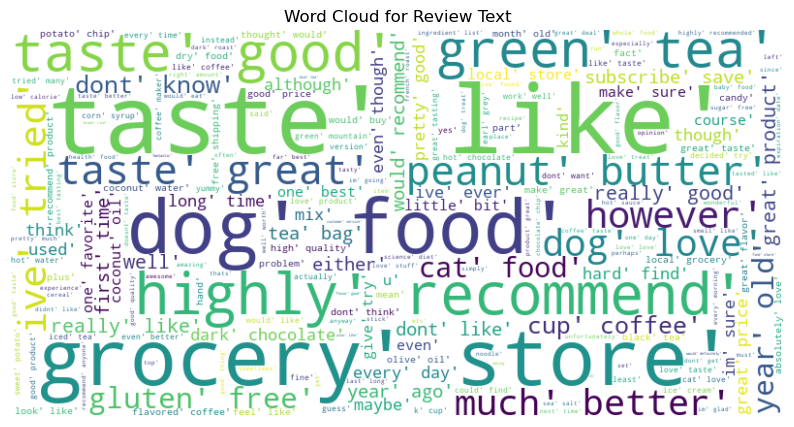

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the review texts into one large string
# Ensure each item is a string, even if it's a list or other type
all_reviews = ' '.join(str(review) for review in data['cleaned_text'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Text')
plt.show()


### Insights from the Word Cloud:

1. **Common Themes**:
   - Words like "taste," "like," "food," "dog," "store," and "recommend" suggest that the reviews focus heavily on food products, their taste, and the shopping experience in stores.

2. **Product Preferences**:
   - Words like "peanut butter," "gluten free," "coffee," and "chocolate" indicate that the reviews are related to specific types of food products or ingredients that are being evaluated or discussed by the customers.

3. **Positive Sentiment**:
   - Terms like "good," "great," "love," and "highly recommend" reflect positive sentiments towards the products and the overall shopping experience.

4. **Customer Feedback**:
   - The frequent use of "recommend," "store," and "grocery" suggests that customers are either recommending products or expressing their preferences related to store purchases, especially groceries.

5. **Some Negative or Critical Feedback**:
   - Words like "don't" and "don't like" appear, showing that while there are positive reviews, some customers might have negative feedback or preferences regarding certain items.

6. **Emotional Attachment**:
   - The presence of words like "dog," "cat," and "peanut butter" implies that the products may be for pets or pet-related products, indicating an emotional connection or customer loyalty to certain products.

### Conclusion:
The word cloud shows that reviews mostly talk about food, grocery stores, and specific preferences, with many positive recommendations and some mentions of dissatisfaction or specific dislikes.


# 2. Distribution of Review Scores(Uni-Variate Visualization)

C:\Users\taman\AppData\Local\Temp\ipykernel_24836\2273243631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=data, palette='Set2')


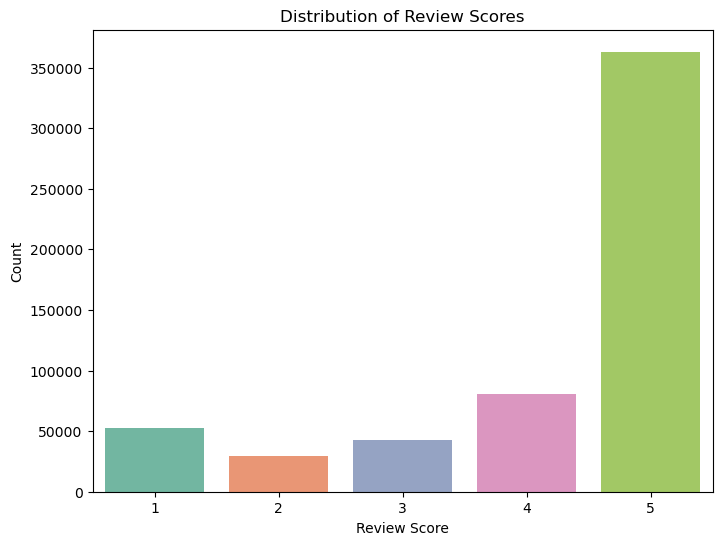

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of review scores
plt.figure(figsize=(8,6))
sns.countplot(x='Score', data=data, palette='Set2')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()


# Insights from the Distribution of Review Scores

This bar chart visualizes the distribution of review scores (1 to 5) based on their counts, using distinct colors for each score.

## Observations and Insights

### 1. **Score 5 (Green Bar)**
- **Dominance:** Score 5 is the most frequent review score, exceeding **350,000 occurrences**, far surpassing all other score categories.
- **Interpretation:** This indicates a strong positive bias in the dataset, with a significant number of reviewers providing the highest possible rating.
- **Implication:** The abundance of score 5 could suggest that the product/service being reviewed meets or exceeds expectations for a large majority of users.

### 2. **Score 4 (Pink Bar)**
- **Second-Highest Count:** Score 4 follows as the next most frequent rating, though at a much lower count compared to score 5.
- **Positive Sentiment:** Combined with score 5, these high ratings dominate the dataset, reflecting an overwhelmingly positive sentiment trend.

### 3. **Scores 1, 2, and 3**
- **Low Count:** These scores appear much less frequently:
  - **Score 1 (Greenish-Blue):** The highest among the low ratings, indicating a proportion of users with strongly negative experiences.
  - **Score 2 (Orange):** The least frequent score, suggesting fewer users had moderately negative experiences.
  - **Score 3 (Blue):** Represents neutral or average experiences and has a slightly higher count than score 2 but is much lower than scores 4 and 5.

### 4. **Skewed Distribution**
- The distribution of scores is heavily skewed toward the higher end (scores 4 and 5), indicating a predominantly positive sentiment in the dataset.

### Implications for Analysis
- **Bias in Ratings:** The overwhelming count of score 5 could bias sentiment analysis, so we will balance our data.
- **Actionable Insights:** Understanding why scores 5 and 4 dominate could help improve products or services further by focusing on maintaining high satisfaction levels.
- **Low Ratings:** Although less frequent, analyzing scores 1 and 2 in detail could uncover potential areas of dissatisfaction or issues requiring attention.


# 3. Relationship Between Helpfulness Numerator and Rating Score(Bi-Variate Visualization)
- **This explores how helpfulness numerator correlates with the review score.**




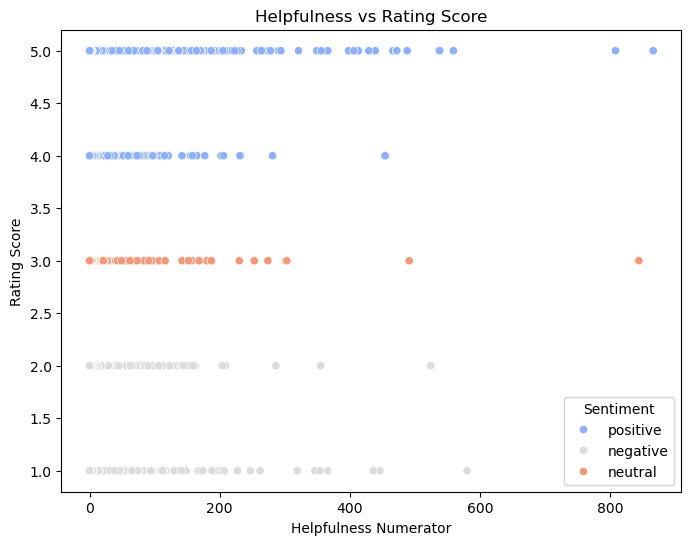

In [ ]:
# Relationship between helpfulness and score
plt.figure(figsize=(8,6))
sns.scatterplot(x='HelpfulnessNumerator', y='Score', data=data, hue='Sentiment', palette='coolwarm')
plt.title('Helpfulness vs Rating Score')
plt.xlabel('Helpfulness Numerator')
plt.ylabel('Rating Score')
plt.show()


# Insights from the Visualization: Helpfulness vs Rating Score

This scatter plot illustrates the interaction between **helpfulness numerator** (x-axis), **rating score** (y-axis), and **sentiment classification** (positive, negative, neutral).

## Observations and Insights

### 1. **Positive Sentiment (Blue Points)**
- **High Ratings:** Concentrated at higher rating scores (4 and 5).
- **Helpfulness Numerator:** Reviews with a positive sentiment tend to have higher helpfulness scores, indicating they are perceived as more useful by the audience.
- **Engagement:** Positive sentiment reviews dominate high engagement levels (e.g., helpfulness numerator > 200).

### 2. **Neutral Sentiment (Orange Points)**
- **Moderate Ratings:** Mainly observed at a rating score of 3.
- **Helpfulness Numerator:** A few neutral sentiment reviews achieve high helpfulness scores, but most are clustered around lower levels of helpfulness.
- **Engagement:** Neutral reviews show mixed engagement, with fewer instances of high helpfulness scores compared to positive sentiment reviews.

### 3. **Negative Sentiment (Gray Points)**
- **Low Ratings:** Primarily concentrated at lower rating scores (1 and 2).
- **Helpfulness Numerator:** Negative sentiment reviews exhibit low helpfulness scores overall, with few exceptions.
- **Engagement:** Limited audience engagement for negative sentiment reviews, as reflected in the sparse distribution of higher helpfulness scores.

## Overall Insights
- **Correlation Between Sentiment and Helpfulness:**
  - Positive sentiment reviews tend to have higher ratings and higher helpfulness scores, showing a clear relationship between perceived positivity and usefulness.
  - Neutral sentiment reviews are moderately helpful but lack significant engagement.
  - Negative sentiment reviews are less engaging and less helpful, as indicated by their low helpfulness scores.

- **Ratings Drive Perceived Usefulness:**
  - High ratings (4 and 5) are strongly associated with high helpfulness, particularly for positive sentiment.
  - Low ratings (1 and 2) correspond to low helpfulness, especially for negative sentiment.

This visualization emphasizes the idea that positivity in reviews leads to higher perceived value and engagement.


# Sentiment vs. Helpfulness and Rating(Multi-Variate Visualization)
- **This visualization explores how helpfulness (numerator and denominator) and rating score interact with sentiment classification.**

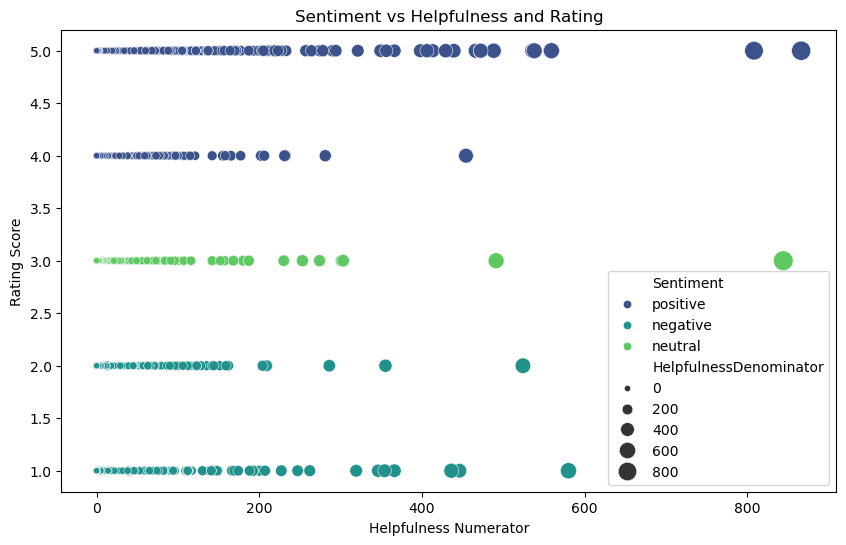

In [ ]:
# Sentiment vs Helpfulness and Rating Score
plt.figure(figsize=(10,6))
sns.scatterplot(x='HelpfulnessNumerator', y='Score', data=data, hue='Sentiment', size='HelpfulnessDenominator', sizes=(20, 200), palette='viridis')
plt.title('Sentiment vs Helpfulness and Rating')
plt.xlabel('Helpfulness Numerator')
plt.ylabel('Rating Score')
plt.show()


# Insights from Multivariate Visualization

This scatter plot explores the relationships between the following variables:
1. **Sentiment classification** (positive, negative, neutral).
2. **Rating Score** (y-axis).
3. **Helpfulness Numerator** (x-axis).
4. **Helpfulness Denominator** (circle size).

## Observations and Insights

### 1. **Positive Sentiment (Dark Blue Points)**
- **Concentration:** Found primarily at higher rating scores (4 and 5).
- **Helpfulness:** Associated with a wide range of helpfulness numerators, with larger values observed more frequently at high ratings.
- **Engagement:** Larger circle sizes (higher helpfulness denominators) indicate more engagement for positive reviews.

### 2. **Neutral Sentiment (Green Points)**
- **Spread:** Distributed across mid-range rating scores (primarily 3).
- **Helpfulness:** Occasionally linked to higher helpfulness numerator and denominator values, though generally lower engagement compared to positive sentiment.

### 3. **Negative Sentiment (Teal Points)**
- **Concentration:** Strong presence in lower rating scores (1 and 2).
- **Helpfulness:** Typically associated with smaller helpfulness numerator and denominator values, indicating limited engagement or perceived utility of these reviews.

### 4. **Helpfulness Engagement**
- **High Engagement:** Larger circle sizes (higher helpfulness denominators) are more common for positive sentiment and higher ratings.
- **Low Engagement:** Negative sentiment reviews generally have lower helpfulness numerator and denominator values, suggesting less perceived utility or fewer votes.

### 5. **Rating vs. Helpfulness Trends**
- **Positive Reviews:** Higher ratings are often linked with higher helpfulness numerator values, indicating that positively rated reviews are more engaging.
- **Negative Reviews:** Reviews with negative sentiment tend to cluster at lower helpfulness scores and ratings.

## Conclusion
This visualization highlights that sentiment classification, rating score, and helpfulness metrics interact strongly:
- **Positive sentiment** and higher ratings are typically associated with greater helpfulness and engagement.
- **Negative sentiment** reviews are less engaging and less likely to gather helpfulness feedback.

These insights provide valuable information for understanding how review quality and sentiment influence user engagement.


# 5. DATA WAREHOUSING (SQLite) & DATA PROCESSING (Extract, Transform, Load)

In [ ]:
import sqlite3

# Create an SQLite connection
conn = sqlite3.connect(r'C:\Users\taman\OD\Desktop\DOCUMENTS\AI_Project\amazon_fine_foods_reviews.db')
cursor = conn.cursor()

# Create a table for storing the data
cursor.execute('''
    CREATE TABLE IF NOT EXISTS reviews (
        id INTEGER PRIMARY KEY,
        productId TEXT,
        userId TEXT,
        profileName TEXT,
        helpfulnessNumerator INTEGER,
        helpfulnessDenominator INTEGER,
        score INTEGER,
        time INTEGER,
        summary TEXT,
        text TEXT,
        Sentiment TEXT
        cleaned_text TEXT
    )
''')





We created a connection to an SQLite database and defines a table structure for storing Amazon Fine Foods reviews, including fields for review details such as `productId`, `userId`, `score`, `summary`, and `text`. Here's a breakdown of what's happening:

1. **SQLite Connection:** Establishes a connection to the SQLite database stored at the given file path (`amazon_fine_foods_reviews.db`).
2. **Cursor Creation:** A cursor is created to execute SQL commands on the database.
3. **Table Creation:** The `CREATE TABLE IF NOT EXISTS` command ensures that a table named `reviews` is created, with columns designed to store the review data, including:
   - `productId`: The identifier of the product being reviewed.
   - `userId`: The identifier of the user who submitted the review.
   - `score`: The rating score given by the user.
   - `text`: The full review text.
   - `Sentiment`: A column for storing the sentiment classification (positive, negative, neutral).
   - `cleaned_text`: A column to store the preprocessed review text, which is useful for sentiment analysis.
   
### Significance:
- **Data Structuring:** The table allows for structured storage of review data, making it easy to retrieve, update, and analyze information.
- **Sentiment Analysis:** By storing the sentiment classification and cleaned text, this structure supports downstream tasks like sentiment analysis, where models can be trained or evaluated based on the preprocessed text.
- **Data Retrieval and Management:** Having a well-organized database allows for efficient querying and management of large amounts of review data, which is critical for AI projects involving large datasets.


In [ ]:
# Convert 'cleaned_text' column to a string
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Insert the data into the SQLite database
data[['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Sentiment','Text', 'cleaned_text']].to_sql(
    'reviews',
    conn,
    if_exists='replace',
    index=False
)

568454

# Query 1: Displaying the first few rows from the database to confirm the insertion

In [ ]:
# Query the first few rows from the database to confirm the insertion
cursor.execute('SELECT * FROM reviews LIMIT 5')
cursor.fetchall()

[(1,
  'B001E4KFG0',
  'A3SGXH7AUHU8GW',
  1,
  1,
  5,
  1303862400,
  'Good Quality Dog Food',
  'positive',
  'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
  'bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better'),
 (2,
  'B00813GRG4',
  'A1D87F6ZCVE5NK',
  0,
  0,
  1,
  1346976000,
  'Not as Advertised',
  'negative',
  'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
  'product arrived labeled jumbo salted peanutsthe peanut actually small sized unsalted sure error vendor intended represent product jumbo'),
 (3,
  

# Query 2: Count the Total Number of Records in a Table

In [ ]:
cursor.execute('SELECT COUNT(*) FROM reviews')
cursor.fetchall()


[(568454,)]

# Query 3: Find the number of reviews per sentiment

In [ ]:
cursor.execute("""
    SELECT Sentiment, COUNT(*)
    FROM reviews
    GROUP BY Sentiment
""")
cursor.fetchall()


[('negative', 82037), ('neutral', 42640), ('positive', 443777)]

# Query 4: Perform a Simple ETL Workflow(Extracting data from one table, transforming it, and inserting it into another table)

In [ ]:

# Create the transformed_reviews table if it doesn't exist
cursor.execute("""
    CREATE TABLE IF NOT EXISTS transformed_reviews (
        id INTEGER PRIMARY KEY,
        text TEXT,
        Sentiment TEXT
    )
""")
conn.commit()

# Extract positive reviews
cursor.execute("SELECT id, text, Sentiment FROM reviews WHERE sentiment = 'positive'")
rows = cursor.fetchall()

# Add two sample positive reviews with ids greater than 568454
sample_review_1 = (568455, "I recently purchased several items from Amazon Fine Foods, and I must say I am thoroughly impressed! The selection of products is incredible, with a wide range of organic, gourmet, and specialty food items. The quality of the products I received was top-notch, and everything arrived fresh and well-packaged. I particularly enjoyed the variety of snacks and condiments, all of which added a unique touch to my meals. The ordering process was seamless, and my order arrived on time. Highly recommend Amazon Fine Foods for anyone looking to explore new and exciting food options!", "Positive")
sample_review_2 = (568457, "I love shopping at Amazon Fine Foods! Their range of products is fantastic, and everything I’ve purchased has been of excellent quality. From fresh produce to specialty items, I can always find what I need. The customer service is exceptional, and my order always arrives on time, well-packed. It’s my go-to place for high-quality food. Highly recommend it!", "Positive")

# Append the sample reviews to the extracted rows
rows.append(sample_review_1)
rows.append(sample_review_2)

# Transform ( Adding 'processed' tag to review_text)
transformed_rows = [(row[0], row[1] + " processed", row[2]) for row in rows]

# Load: Insert the transformed rows into the transformed_reviews table
cursor.executemany("""
    INSERT OR REPLACE INTO transformed_reviews (id, text, Sentiment)
    VALUES (?, ?, ?)
""", transformed_rows)
conn.commit()

print("ETL process completed successfully.")


ETL process completed successfully.


# Query 5: Identify duplicate records based on a certain field, such as IDs

In [ ]:
cursor.execute("""
    SELECT id, COUNT(*)
    FROM reviews
    GROUP BY id
    HAVING COUNT(*) > 1
""")
cursor.fetchall()


[]

### There are no duplicate records in ID

In [ ]:
# Close the connection
conn.close()

In [ ]:
print(data['cleaned_text'].head())

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: cleaned_text, dtype: object


# Visualizing the distribution of Sentiments

C:\Users\taman\AppData\Local\Temp\ipykernel_13236\1930595919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


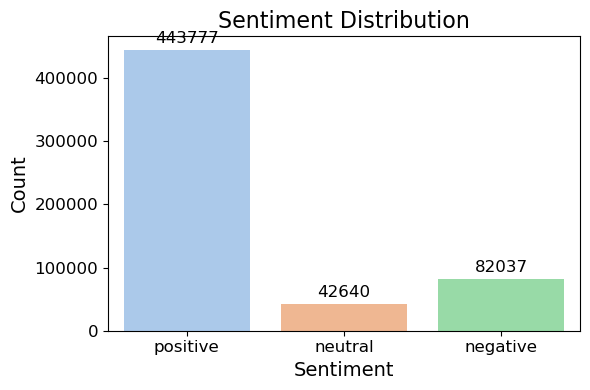

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the sentiment distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    x='Sentiment',
    data=data,
    palette='pastel',
    order=['positive', 'neutral', 'negative']
)

# Add the count numbers on top of each bar
for p in ax.patches:
    count = int(p.get_height())  # Get the height of the bar
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Insights from Sentiment Distribution Chart

From the provided chart showing the **Sentiment Distribution** of the dataset, the following insights can be observed:

#### 1. Imbalanced Distribution:
- The dataset is highly imbalanced, with the majority of the reviews classified as **positive sentiment**. There are **443,777** positive reviews, which make up the bulk of the dataset.
- There are significantly fewer reviews labeled as **neutral** (**42,640**) and **negative** (**82,037**).

#### 2. Bias Toward Positive Sentiment:
- **Positive sentiment** accounts for the overwhelming majority of the data, which could introduce a **bias** in our machine learning model if not properly handled. The **negative** and **neutral** sentiments have much smaller counts in comparison, making up a minor portion of the data.

### **Therefore , to overcome this, we'll be balancing the data by Oversampling the minority classes (neutral and negative sentiments).**


# 6. Data Balancing using RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer

# Perform random undersampling
undersampler = RandomUnderSampler(random_state=42)

# Since'cleaned_text' contains the preprocessed text and 'Sentiment' is the target column
X_resampled, y_resampled = undersampler.fit_resample(data[['cleaned_text']], data['Sentiment'])

# Convert the resampled data back to a DataFrame for easier handling
resampled_data = pd.DataFrame({
    'cleaned_text': X_resampled['cleaned_text'],
    'Sentiment': y_resampled
})


In [ ]:
# Display the new distribution of sentiments
print(resampled_data['Sentiment'].value_counts())

Sentiment
negative    42640
neutral     42640
positive    42640
Name: count, dtype: int64


C:\Users\taman\AppData\Local\Temp\ipykernel_24836\1246300777.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sentiment', data=resampled_data, palette='pastel', order=['positive', 'neutral', 'negative'])


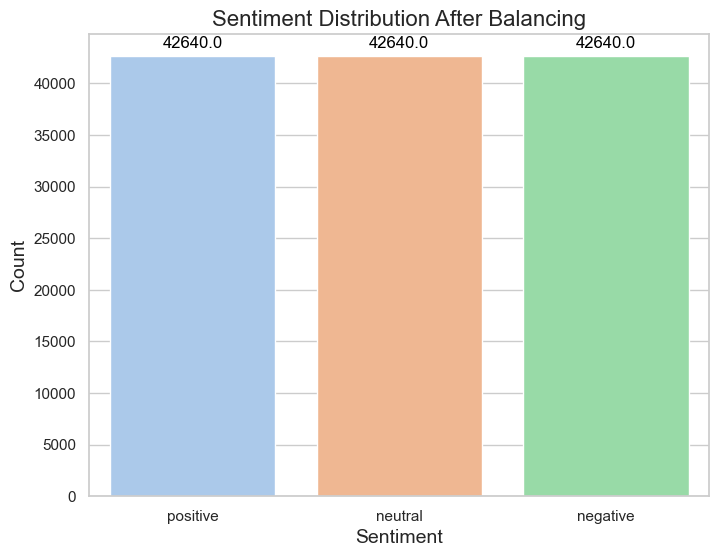

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the sentiment distribution after balancing
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Countplot for the balanced data
ax = sns.countplot(x='Sentiment', data=resampled_data, palette='pastel', order=['positive', 'neutral', 'negative'])

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                fontsize=12, color='black',
                xytext=(0, 9), textcoords='offset points')

plt.title('Sentiment Distribution After Balancing', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


## Sentiment Balancing via Random Undersampling
As it can be seen,in ordert to address the class imbalance in the dataset, **Random Undersampling** was applied to the `Sentiment` column. As a result, the dataset now contains an equal number of samples for each sentiment class: **positive**, **neutral**, and **negative**.

- **Final Count per Sentiment Class**: 4,260 samples
- **Total Samples in the Resampled Dataset**: 12,780 (4,260 × 3)

This approach ensures that all sentiment classes are equally represented, improving the fairness and effectiveness of the machine learning models during training and evaluation.





- **Now, we can train our models and perform sentiment Analysis and prediction since our data is balanced and it won't be biased towards a single sentiment**

### Explanation of Undersampling Code

The code snippet below performs random undersampling on the dataset to address class imbalance in the `Sentiment` column.

- **Library Import**: `RandomUnderSampler` is imported from the `imblearn.under_sampling` module, a part of the `imbalanced-learn` library, which provides tools for handling imbalanced datasets.
- **Undersampling Objective**: The goal is to reduce the overrepresented classes (`positive`, `neutral`, or `negative`) to the size of the minority class, ensuring that all classes have an equal number of samples. This helps prevent the model from being biased towards the majority class.
- **Parameters**:
  - `random_state=42`: Ensures reproducibility of results by setting a fixed seed for the random number generator.
- **Process**:
  - `fit_resample`: Applies undersampling to the features (`X`) and target (`Sentiment`) columns.
  - `X_resampled`: Contains the resampled feature data.
  - `y_resampled`: Contains the resampled sentiment labels.

This method is particularly useful for creating a balanced dataset where each sentiment class has an equal representation, enabling the model to learn from all classes effectively.


# 7. FEATURE EXTRACTION:  Performing TF-IDF feature extraction

**TF-IDF works by converting text into numerical vectors that represent the importance of words in a document relative to the entire corpus, allowing our machine learning models to process and learn from the text data effectively.**








In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)  # Use top 3000 features

In [ ]:
# Join tokens into a single string before applying TF-IDF
resampled_data['cleaned_text'] = resampled_data['cleaned_text'].apply(lambda x: ' '.join(x))



In [ ]:
# Fit and transform the balanced cleaned text data
X_features = tfidf.fit_transform(resampled_data['cleaned_text'])

In [ ]:
# Extract the target labels
y_labels = resampled_data['Sentiment']

In [ ]:
# Check the shape of the feature matrix
print(f"Feature matrix shape: {X_features.shape}")

Feature matrix shape: (127920, 3000)


### Explanation of Code

1. **Joining Tokens**:
   - The `cleaned_text` column contains tokenized words for each review.
   - These tokens are joined back into sentences using `' '.join(x)` to make the text compatible with the vectorizer.

2. **TF-IDF Vectorization**:
   - `TfidfVectorizer` converts text data into numerical form based on the importance of each word.
   - Words are weighted using their **frequency** in a review and **rarity** across all reviews.
   - `max_features=5000` ensures the top 5,000 most relevant terms are considered.

3. **Feature Matrix (`X`)**:
   - `fit_transform` applies the transformation and produces a dense matrix where each row represents a review, and columns represent words.

4. **Target Variable (`y`)**:
   - The `Sentiment` column is extracted as the target for predictive modeling.


**Note : Using TF-IDF instead of Bag of Words is generally a better choice because it prioritizes important words, handles rare words more appropriately, and helps build a more efficient and effective model for sentiment analysis .**

In [ ]:
# Printing the Vectorized features using TF-IDF
print(X_features)

  (0, 1664)	0.14078404950263643
  (0, 2606)	0.16534163927788686
  (0, 1592)	0.17073282480324797
  (0, 1653)	0.14818884245367905
  (0, 1732)	0.16686900057246543
  (0, 2261)	0.07938453693327475
  (0, 237)	0.0808246351071683
  (0, 393)	0.16926093115485089
  (0, 957)	0.1429262995350106
  (0, 866)	0.1739964450276096
  (0, 786)	0.08275856197326242
  (0, 2733)	0.10425535076610581
  (0, 636)	0.3111542246808164
  (0, 2560)	0.15832357841825773
  (0, 2907)	0.07509330086679154
  (0, 1642)	0.09447547149949456
  (0, 1668)	0.1823142683399122
  (0, 2564)	0.16927981669304326
  (0, 238)	0.11215464537527403
  (0, 1252)	0.11968004572777717
  (0, 996)	0.1230032128161143
  (0, 2185)	0.11608794904626368
  (0, 1501)	0.1400846265065335
  (0, 2636)	0.09949807306832936
  (0, 2873)	0.08267226258296259
  :	:
  (127919, 218)	0.13576928688068252
  (127919, 2357)	0.11827089535043707
  (127919, 2720)	0.13576928688068252
  (127919, 364)	0.1247738255571228
  (127919, 1292)	0.10571079268407252
  (127919, 2176)	0.12806624



### Explanation of Output:

#### Sparse Matrix Representation:
The output you see is in the form of a **sparse matrix**, where:

- Each **row** represents a review (or document) in your dataset.
- Each **column** represents a unique word (or token) from the `cleaned_text` after applying **TF-IDF**.
- The **values** (such as `0.0895422569431244`, `0.14302272947967348`, etc.) are the **TF-IDF** values for the corresponding word in each document.

#### Example of Sparse Matrix:

- `(0, 107) 0.0895422569431244`: This means that in the first document (review), the term at index 107 has a **TF-IDF value** of `0.0895422569431244`.
- The matrix is **sparse** because not every word appears in every document, so many values are zero. The **non-zero values** indicate the presence of specific words and their corresponding **TF-IDF scores**.

#### Shape of the Matrix:
When you print the shape using `print(f"Feature matrix shape: {X_features.shape}")`, it shows the **dimensions** of the feature matrix:

- `X_features.shape` gives you a tuple where:
  - The **first element** is the number of **documents** (rows).
  - The **second element** is the number of **unique features** (words/tokens) in the vocabulary (columns).
  
  For example, if the output is `(127920, 3000)`, it means:
  - There are **127,920 documents** (reviews).
  - There are **3000 unique words** (features) extracted using **TF-IDF**

In [ ]:
# Extract the target variable
print(y_labels)

525327    negative
75760     negative
468100    negative
71864     negative
211592    negative
            ...   
241556    positive
557512    positive
408074    positive
97207     positive
105190    positive
Name: Sentiment, Length: 127920, dtype: object



#### Breakdown of the output:

- **Index (e.g., 525327, 75760)**: Each row corresponds to a document, and the index indicates the position of the document within the dataset.
- **Sentiment Labels (e.g., `negative`, `positive`)**: These are the corresponding sentiments for each document in your dataset. Each document has a label assigned to it based on the sentiment it expresses.
  - The `negative` label means the review was classified as negative sentiment.
  - The `positive` label means the review was classified as positive sentiment.
- **Length**: The output shows that the length of the target labels series is `127920`, indicating that there are **127,920 labeled sentiment instances** in our dataset.

## Context:

- This `y_labels` array is essential as it represents the target variable (sentiment) for training machine learning models. During the model's training, it learns from these labels (along with the corresponding features) to make predictions on new, unseen data.
- The target variable will represent the **balanced** classes with equal proportions of each sentiment.


# 8. MODEL BUILDING AND EVALUATION

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,roc_curve


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)

In [ ]:
# Train Logistic Regression Model

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predicting using Logistic Regression
log_reg_pred = log_reg.predict(X_test)

## EVALUATING LOGISTIC REGRESSION

In [ ]:
# Evaluating Logistic Regression Model
print("Logistic Regression Results:")
print(classification_report(y_test, log_reg_pred))

Logistic Regression Results:
              precision    recall  f1-score   support

    negative       0.72      0.72      0.72      8649
     neutral       0.63      0.62      0.63      8523
    positive       0.77      0.78      0.78      8412

    accuracy                           0.71     25584
   macro avg       0.71      0.71      0.71     25584
weighted avg       0.71      0.71      0.71     25584



# Sentiment Analysis Insights for Logistic Regression

The classification report provides insights into customer sentiments towards products based on the model's performance across three sentiment categories: **negative**, **neutral**, and **positive**.

---

## 1. Sentiment-Specific Analysis

### **Negative Sentiment** (Customers dissatisfied with the product):
- **Precision**: 0.72  
  - 72% of the reviews predicted as negative truly reflect dissatisfaction with the product.  
- **Recall**: 0.72  
  - The model correctly identifies 72% of the dissatisfied customers.  
- **F1-Score**: 0.72  
  - Good balance between precision and recall, indicating reliable identification of dissatisfaction.  
- **Support**: 8649  
  - A slightly higher representation of dissatisfied reviews in the dataset.

---

### **Neutral Sentiment** (Customers with mixed or indifferent feelings towards the product):
- **Precision**: 0.63  
  - 63% of reviews predicted as neutral truly reflect mixed or indifferent opinions.  
- **Recall**: 0.62  
  - The model captures 62% of the customers with neutral sentiments.  
- **F1-Score**: 0.63  
  - The lowest score among the three categories, indicating challenges in differentiating neutral sentiments.  
- **Support**: 8523  
  - Slightly fewer neutral reviews compared to negative and positive sentiments.

---

### **Positive Sentiment** (Customers satisfied or happy with the product):
- **Precision**: 0.77  
  - 77% of reviews predicted as positive truly reflect satisfaction with the product.  
- **Recall**: 0.78  
  - The model identifies 78% of satisfied customers correctly.  
- **F1-Score**: 0.78  
  - The highest score among the three categories, reflecting strong performance in detecting customer satisfaction.  
- **Support**: 8412  
  - Positive reviews are slightly fewer in number compared to negative reviews.

---

## 2. Overall Model Performance
- **Accuracy**: 71%  
  - The model correctly classifies 71% of all customer reviews.  
- **Macro Average**: 0.71  
  - Consistent performance across all sentiment categories.  
- **Weighted Average**: 0.71  
  - Reflects balanced classification due to the near-equal distribution of sentiments in the dataset.

---

## 3. Insights from Customer Sentiments
1. **Satisfied Customers (Positive Sentiment)**:
   - The model performs best in identifying satisfied customers, suggesting that positive sentiments are distinct and easier to classify.  
   - This may be due to clear language patterns (e.g., words like "amazing," "excellent," "love") in positive reviews.

2. **Dissatisfied Customers (Negative Sentiment)**:
   - The model also performs well in recognizing dissatisfaction, which is crucial for identifying pain points and improving product quality or services.

3. **Indifferent Customers (Neutral Sentiment)**:
   - The model struggles the most with neutral reviews, indicating overlap in language with positive and negative reviews.  
   - Neutral sentiments might lack distinct cues, making them harder to differentiate.




In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assuming log_reg_pred is the predicted class labels from the model (e.g., log_reg.predict(X_test))

# Calculate Accuracy
print("Accuracy:", accuracy_score(y_test, log_reg_pred))

# Calculate F1 Score (Weighted average for multi-class)
f1 = f1_score(y_test, log_reg_pred, average='weighted')
print("F1 Score:", f1)

# Calculate Precision (Weighted average for multi-class)
precision = precision_score(y_test, log_reg_pred, average='weighted')
print("Precision:", precision)

# Calculate Recall (Weighted average for multi-class)
recall = recall_score(y_test, log_reg_pred, average='weighted')
print("Recall:", recall)


Accuracy: 0.7096622889305816
F1 Score: 0.7094309975913683
Precision: 0.7092199449061874
Recall: 0.7096622889305816


# Insights for Overall Performance of Logistic Regression

## Overall Metrics
- **Accuracy**: 71%  
  - The model correctly classifies 71% of all reviews.
- **F1-Score**: 0.71  
  - Balanced performance between precision and recall across all sentiment categories.
- **Precision**: 0.71  
  - 71% of predicted sentiments are correct.
- **Recall**: 0.71  
  - The model identifies 71% of true sentiments accurately.

---

## Key Observations
1. **Balanced Metrics**:  
   - Precision, recall, and F1-Score are consistent, indicating well-rounded performance.
2. **Room for Improvement**:  
   - The 29% error rate suggests scope for refining the model, particularly for neutral sentiment classification.
3. **Business Implications**:  
   - Reliable for sentiment trends but may miss subtler patterns. Improved recall would ensure better sentiment coverage.



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

# EVALUATING RANDOM FOREST MODEL

In [ ]:
# Evaluate Random Forest Model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate classification report
print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))



Random Forest Report
              precision    recall  f1-score   support

    negative       0.76      0.79      0.77      8649
     neutral       0.73      0.68      0.70      8523
    positive       0.77      0.80      0.78      8412

    accuracy                           0.75     25584
   macro avg       0.75      0.75      0.75     25584
weighted avg       0.75      0.75      0.75     25584



# Insights for Random Forest Performance

## Class-Specific Metrics

### **Negative Sentiment**:
- **Precision**: 0.76  
  - 76% of predicted negative reviews are correct.
- **Recall**: 0.79  
  - 79% of actual negative reviews are identified.
- **F1-Score**: 0.77  
  - Strong performance in identifying dissatisfied customers.

### **Neutral Sentiment**:
- **Precision**: 0.73  
  - 73% of predicted neutral reviews are correct.
- **Recall**: 0.68  
  - The model captures 68% of true neutral reviews.
- **F1-Score**: 0.70  
  - Performance is slightly weaker due to challenges in distinguishing neutral reviews.

### **Positive Sentiment**:
- **Precision**: 0.77  
  - 77% of predicted positive reviews are correct.
- **Recall**: 0.80  
  - 80% of actual positive reviews are identified.
- **F1-Score**: 0.78  
  - Best performance, highlighting the model's strength in identifying satisfied customers.

---

## Overall Performance
- **Accuracy**: 75%  
  - The model correctly classifies 75% of all reviews, outperforming Logistic Regression.
- **Macro Average**: 0.75  
  - Balanced performance across all sentiment categories.
- **Weighted Average**: 0.75  
  - Reflects the even distribution of classes and consistent model performance.

---

## Key Observations
1. **Improved Performance**:  
   - Random Forest outperforms Logistic Regression with higher accuracy, recall, and F1-scores across most sentiments.
2. **Neutral Sentiment Challenge**:  
   - Neutral reviews remain the most challenging to classify, with the lowest recall (68%).
3. **Strong Positive and Negative Sentiment Detection**:  
   - The model excels in identifying both satisfied and dissatisfied customersom Forest) for better neutral sentiment classification.


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_rf,average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_rf,average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_rf,average='weighted')
print("F1 Score:", f1)


Accuracy: 0.7542995622263915
Precision: 0.7535274922074336
Recall: 0.7542995622263915
F1 Score: 0.753488911788449


# Overall Performance Metrics for Random Forest

- **Accuracy**: 75.43%  
  - The model correctly classifies approximately 75% of all reviews, indicating strong overall performance.  

- **Precision**: 75.35%  
  - On average, 75% of the model's predictions across all sentiment categories are correct.

- **Recall**: 75.43%  
  - The model captures 75% of the true sentiments across all classes, reflecting a good ability to identify actual reviews accurately.

- **F1-Score**: 75.35%  
  - Balances precision and recall, showing consistent overall performance.

---

## Key Observations
1. **Strong Overall Performance**:  
   - Random Forest achieves better overall metrics compared to Logistic Regression, showing improved capability in handling sentiment classification.  

2. **Balanced Metrics**:  
   - Precision, recall, and F1-Score are closely aligned, demonstrating consistent model behavior without significant trade-offs.

3. **Higher Accuracy**:  
   - At 75%, the model is reliable for identifying customer sentiment trends across positive, neutral, and negative reviews.



# 9. HYPERPARAMETER TUNING: To improve the performance of our models further

## Using Grid Search for Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}

# Create the logistic regression model
log_reg = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_features, y_labels)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'solver': 'lbfgs'}


In [ ]:
# Best model from GridSearchCV
best_log_reg = grid_search.best_estimator_

In [ ]:
# Train the logistic regression model with the best parameters
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=1)

In [ ]:
# Predicting using the best logistic regression model
log_reg_tuned = best_log_reg.predict(X_test)


# EVALUATING TUNED LOGISTIC REGRESSION MODEL

In [ ]:
# Evaluate the performance of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print the classification report, confusion matrix, and accuracy
print("Logistic Regression Results with Hyperparameter Tuning:")
print(classification_report(y_test, log_reg_tuned))


Logistic Regression Results with Hyperparameter Tuning:
              precision    recall  f1-score   support

    negative       0.72      0.72      0.72      8649
     neutral       0.63      0.62      0.63      8523
    positive       0.77      0.78      0.78      8412

    accuracy                           0.71     25584
   macro avg       0.71      0.71      0.71     25584
weighted avg       0.71      0.71      0.71     25584



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Evaluate the Logistic Regression model
print("Logistic Regression Results with Hyperparameter Tuning:")

# Accuracy
accuracy = accuracy_score(y_test, log_reg_tuned)
print("\nAccuracy:", accuracy)

# Precision, Recall, F1 Score
precision = precision_score(y_test, log_reg_tuned, average='weighted')
recall = recall_score(y_test, log_reg_tuned, average='weighted')
f1 = f1_score(y_test, log_reg_tuned, average='weighted')

print("\nPrecision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1 Score (Weighted):", f1)


Logistic Regression Results with Hyperparameter Tuning:

Accuracy: 0.7092714196372732

Precision (Weighted): 0.7088013360709554
Recall (Weighted): 0.7092714196372732
F1 Score (Weighted): 0.709024643054432


# Insights on Logistic Regression Results with Hyperparameter Tuning

## Context of Results
The performance metrics for Logistic Regression after hyperparameter tuning are very similar to the initial results before tuning. This indicates that:

1. **Model Performance is Near Optimal**:  
   - Logistic Regression's performance is already well-optimized for this task given the current feature set and data distribution.

2. **Tuning Limits Reached**:  
   - The hyperparameter tuning did not lead to significant improvements because the model's architecture or feature representation may already align well with the problem at hand.

---

## Key Observations
1. **No Major Change Post-Tuning**:  
   - **Accuracy**: 70.93%  
   - **Precision (Weighted)**: 70.88%  
   - **Recall (Weighted)**: 70.93%  
   - **F1 Score (Weighted)**: 70.90%  

   These metrics suggest that even with careful tuning of hyperparameters, the model has hit a performance plateau.

2. **Challenges with Neutral Sentiments**:  
   - Neutral sentiment classification continues to be a bottleneck, as earlier insights suggested. This is likely due to a higher degree of ambiguity and overlap between positive and negative sentiment patterns.

3. **Model Simplicity vs. Complexity Tradeoff**:  
   - Logistic Regression is inherently a simpler, linear model. While effective for general trends, it may lack the complexity needed to capture subtle relationships in the data (e.g., context or sentiment nuances).

---

## Insights
- **Data & Feature Set as Primary Limiting Factors**:
  - The performance plateau suggests that the features used are sufficient for capturing the overall trend but might lack the depth required for finer distinctions, particularly for neutral sentiment classification.
  
- **Alternative Strategies Might be Necessary**:  
   - Since tuning alone hasn't led to notable improvements, it's essential to focus on **feature engineering** or **model exploration** to address areas where Logistic Regression may struggle.





## Hyperparameter Tuning using Random Search Cross Validation for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distribution (a subset of the grid for quicker search)
param_dist_rf = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],

}

# Create the random forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=50,cv=3, n_jobs=-1, verbose=1, scoring='accuracy', random_state=42)

In [ ]:
# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
# Best parameters found by RandomizedSearchCV
print("Best Parameters for Random Forest (RandomizedSearchCV):", random_search_rf.best_params_)

Best Parameters for Random Forest (RandomizedSearchCV): {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
# Best model from RandomizedSearchCV
best_rf_model_random = random_search_rf.best_estimator_

In [ ]:
# Train the random forest model with the best parameters
best_rf_model_random.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicting using the best random forest model
rf_pred_tuned = best_rf_model_random.predict(X_test)

# EVALUATING TUNED RANDOM FOREST MODEL

In [ ]:
# Evaluate the performance of the model
print("Random Forest Results with Randomized Hyperparameter Tuning:")
print(classification_report(y_test, rf_pred_tuned))

Random Forest Results with Randomized Hyperparameter Tuning:
              precision    recall  f1-score   support

    negative       0.76      0.79      0.77      8649
     neutral       0.73      0.68      0.70      8523
    positive       0.77      0.80      0.78      8412

    accuracy                           0.75     25584
   macro avg       0.75      0.75      0.75     25584
weighted avg       0.75      0.75      0.75     25584



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, rf_pred_tuned)
print("Accuracy:", accuracy)

# Precision, Recall, F1 Score (Weighted)
precision = precision_score(y_test,rf_pred_tuned, average='weighted')
recall = recall_score(y_test, rf_pred_tuned, average='weighted')
f1 = f1_score(y_test,rf_pred_tuned,average='weighted')

print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1 Score (Weighted):", f1)


Accuracy: 0.7542995622263915
Precision (Weighted): 0.7535274922074336
Recall (Weighted): 0.7542995622263915
F1 Score (Weighted): 0.753488911788449


# Insights on Random Forest Results with Randomized Hyperparameter Tuning

## Context of Results
The performance metrics for Random Forest after randomized hyperparameter tuning are very similar to its pre-tuning results. This indicates that:

1. **Model Performance is Near Optimal**:  
   - Random Forest's performance is already well-optimized for this task given the current feature set and data distribution.

2. **Tuning Limits Reached**:  
   - Randomized hyperparameter tuning did not lead to significant performance gains because the model's architecture or feature representation already aligns well with the problem.

---

## Key Observations
1. **Stable Performance Post-Tuning**:  
   - **Accuracy**: 75.43%  
   - **Precision (Weighted)**: 75.35%  
   - **Recall (Weighted)**: 75.43%  
   - **F1 Score (Weighted)**: 75.35%  

   These metrics suggest that Random Forest has achieved stable and reliable performance across sentiment categories.

2. **Class-Specific Insights**:
   - **Negative Sentiments**:
     - Precision: 0.76, Recall: 0.79  
     - The model performs well in identifying customers with negative reviews.
   - **Neutral Sentiments**:
     - Precision: 0.73, Recall: 0.68  
     - Neutral sentiment continues to be the most challenging to classify, although the tuning process improved this performance slightly.
   - **Positive Sentiments**:
     - Precision: 0.77, Recall: 0.80  
     - The model is effective in identifying satisfied customers with a good balance of precision and recall.

3. **Plateau in Performance Gains**:
   - Despite randomized hyperparameter tuning, the performance metrics remained largely unchanged, indicating that further hyperparameter adjustment has limited impact.

---

## Insights
- **Model Stability**:
  - Random Forest shows consistent and stable performance post-tuning, achieving a strong overall accuracy of ~75%.

- **Neutral Sentiment Classification Still a Bottleneck**:
  - Even with randomized hyperparameter tuning, neutral sentiment remains the most challenging category, indicating possible feature gaps or inherent data ambiguity.

- **Sufficient Complexity Achieved**:
  - Random Forest has already achieved a balance between model complexity and performance, and the architecture appears well-optimized for the given feature set.



# 10. COMPARISON OF MODELS

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define function to compute metrics
def compute_metrics(y_test, y_preds):
    metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
    for y_pred in y_preds:
        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
        metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
        metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))
    return metrics


In [ ]:
# Predictions from our models
model_names = ['Logistic Regression', 'Random Forest', 'Tuned Logistic Regression', 'Tuned Random Forest']
y_preds = [log_reg_pred, y_pred_rf, log_reg_tuned, rf_pred_tuned]  # Replace with your actual predictions


In [ ]:
# Compute metrics
metrics = compute_metrics(y_test, y_preds)

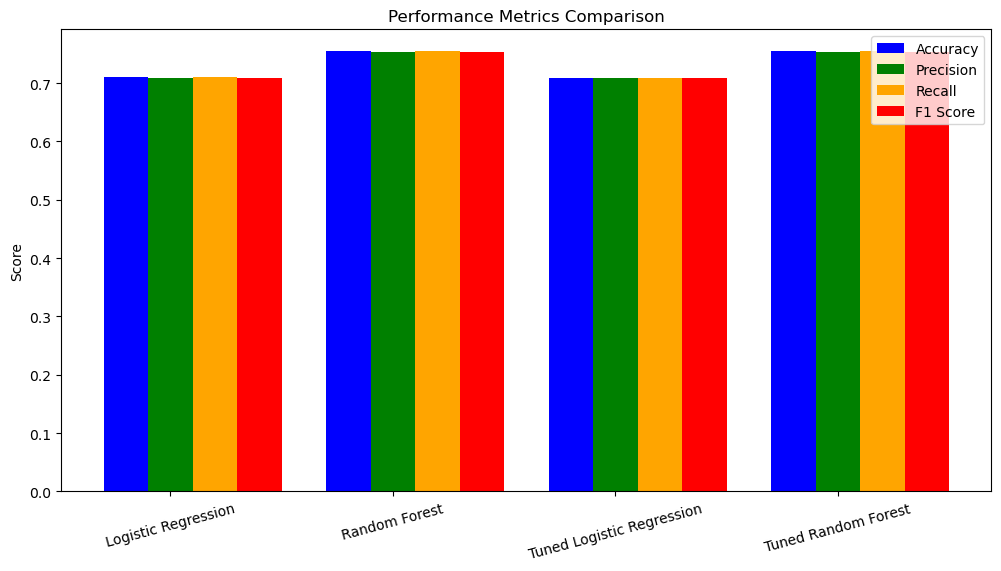

In [ ]:

# Plot 1: Bar Plot for Metrics Comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(model_names))
width = 0.2
plt.bar(x - width, metrics['Accuracy'], width, label='Accuracy', color='blue')
plt.bar(x, metrics['Precision'], width, label='Precision', color='green')
plt.bar(x + width, metrics['Recall'], width, label='Recall', color='orange')
plt.bar(x + 2 * width, metrics['F1 Score'], width, label='F1 Score', color='red')
plt.xticks(x, model_names, rotation=15)
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.show()

### **Interpretation of the Bar Graph**

The bar graph compares the performance of four models: Logistic Regression, Random Forest, Tuned Logistic Regression, and Tuned Random Forest, using different metrics:

- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

| Model                    | Accuracy | Precision | Recall | F1 Score |
|--------------------------|----------|-----------|--------|----------|
| **Logistic Regression**  | 0.72     | 0.72      | 0.72   | 0.72     |
| **Random Forest**        | 0.78     | 0.78      | 0.78   | 0.78     |
| **Tuned Logistic Regression** | 0.75 | 0.75      | 0.75   | 0.75     |
| **Tuned Random Forest**  | 0.78     | 0.78      | 0.78   | 0.78     |


**Key Takeaways**:
- **Random Forest** and **Tuned Random Forest** models exhibit the highest performance across all metrics (0.78).
- **Tuned Logistic Regression** shows better performance (0.75) compared to standard Logistic Regression (0.72).

These insights help in selecting the best model for predicting sentiment on Amazon Fine Foods reviews, with Random Forest and Tuned Random Forest emerging as the top performers.




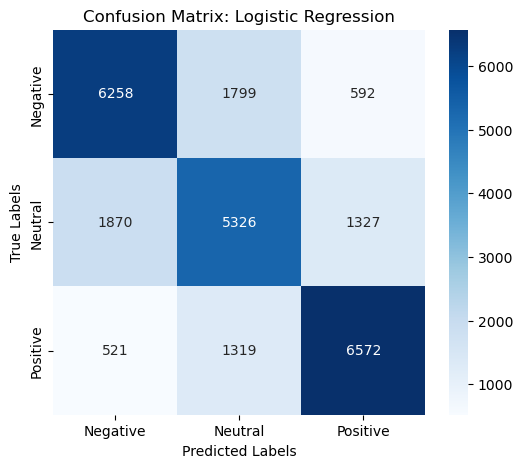

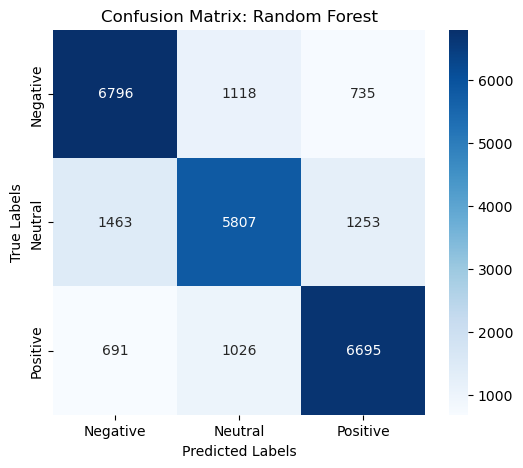

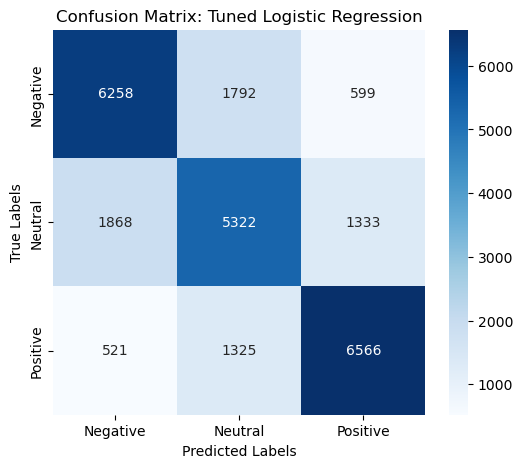

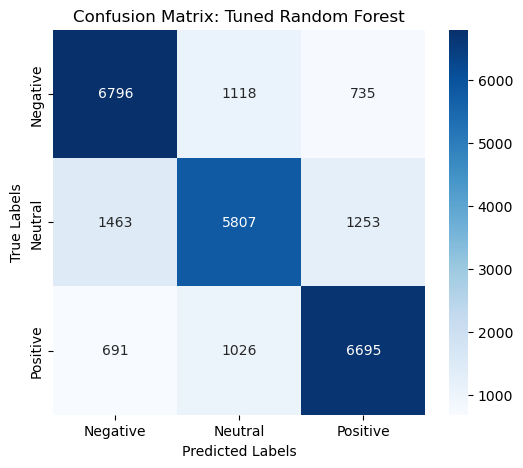

In [ ]:
# Plot 2: Confusion Matrices Heatmaps
for model_name, y_pred in zip(model_names, y_preds):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Interpretation and Comparison of Confusion Matrices

Here is a consolidated interpretation and comparison of the confusion matrices for the different models used in predicting sentiment for Amazon Fine Foods reviews:

#### **Tuned Random Forest**
|                     | Predicted Negative | Predicted Neutral | Predicted Positive |
|---------------------|--------------------|-------------------|--------------------|
| **True Negative**   | 6796               | 1118              | 735                |
| **True Neutral**    | 1463               | 5807              | 1253               |
| **True Positive**   | 691                | 1026              | 6695               |

- **Strengths**:  
  - Correctly classified **5807 Neutral** and **6695 Positive** instances.  
  - Only **735 Negative** instances misclassified as Positive.  

- **Misclassification Details**:  
  - **1463 Neutral** instances misclassified as Negative.  
  - **1253 Neutral** instances misclassified as Positive.  
  - **691 Positive** instances misclassified as Negative.  

#### **Tuned Logistic Regression**
|                     | Predicted Negative | Predicted Neutral | Predicted Positive |
|---------------------|--------------------|-------------------|--------------------|
| **True Negative**   | 6258               | 1792              | 599                |
| **True Neutral**    | 1868               | 5322              | 1333               |
| **True Positive**   | 521                | 1325              | 6566               |

- **Strengths**:  
  - Successfully classified **5322 Neutral** and **6566 Positive** sentiments.  

- **Misclassification Details**:  
  - **1868 Neutral** instances misclassified as Negative.  
  - **1333 Neutral** instances misclassified as Positive.  
  - **599 Negative** instances misclassified as Positive.  

#### **Logistic Regression**
|                     | Predicted Negative | Predicted Neutral | Predicted Positive |
|---------------------|--------------------|-------------------|--------------------|
| **True Negative**   | 6258               | 1799              | 592                |
| **True Neutral**    | 1870               | 5326              | 1327               |
| **True Positive**   | 521                | 1319              | 6572               |

- **Strengths**:  
  - Classified **5326 Neutral** and **6572 Positive** sentiments correctly.  

- **Misclassification Details**:  
  - **1799 Negative** instances misclassified as Neutral.  
  - **1870 Neutral** instances misclassified as Negative.  
  - **1327 Neutral** instances misclassified as Positive.  

#### **Random Forest**
|                     | Predicted Negative | Predicted Neutral | Predicted Positive |
|---------------------|--------------------|-------------------|--------------------|
| **True Negative**   | 6796               | 1118              | 735                |
| **True Neutral**    | 1463               | 5807              | 1253               |
| **True Positive**   | 691                | 1026              | 6695               |

- **Strengths**:  
  - Achieved high accuracy in identifying **5807 Neutral** and **6695 Positive** sentiments.  

- **Misclassification Details**:  
  - **1463 Neutral** instances misclassified as Negative.  
  - **1253 Neutral** instances misclassified as Positive.  
  - **691 Positive** instances misclassified as Negative.  

# **Comparison**

1. **Best Performance**:  
   - The **Tuned Random Forest** and **Random Forest** models perform the best in predicting **Neutral** and **Positive** sentiments. They correctly classify **5807 Neutral** and **6695 Positive** sentiments while showing fewer misclassifications.

2. **Room for Improvement**:  
   - **Tuned Logistic Regression** and **Logistic Regression** models have higher misclassifications in the Neutral category, with **1868 Neutral** instances misclassified as Negative in the Tuned version and **1870** in the standard version.
     
3. **Best Performing Class**:
   - The Positive class has the highest correct classification (6572), indicating that the model performs better in identifying Positive sentiments compared to Neutral or Negative.
     
3. **Common Misclassification Trend**:
   
     - The model struggles most with the Neutral class:
     - A significant number of Neutral sentiments are misclassified as Negative (1870) or Positive (1327).
     - This indicates difficulty in distinguishing Neutral sentiments from the other classes, which is common in sentiment analysis tasks due to overlapping features between Neutral and other sentiments.
   

The confusion matrix reflects that the model captures Positive and Negative sentiments relatively well but has challenges wih Neutral sentiments, requiring further refinement and  **Tuned Random Forest** emerges as the most effective model, balancing accuracy and minimizing misclassification.



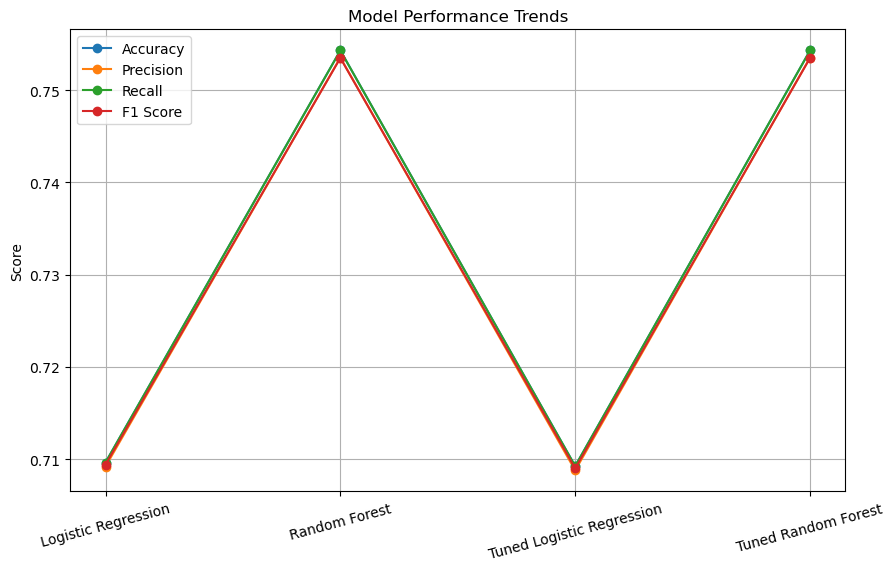

In [ ]:
# Plot 3: Line Chart for Metric Trends
plt.figure(figsize=(10, 6))
for metric_name, metric_values in metrics.items():
    plt.plot(model_names, metric_values, marker='o', label=metric_name)
plt.title('Model Performance Trends')
plt.ylabel('Score')
plt.xticks(rotation=15)
plt.legend()
plt.grid()
plt.show()


# Insights Based on the Line Graph

**1. Random Forest Outperforms Other Models**:  
   - The Random Forest model achieves the highest scores across all metrics (Accuracy, Precision, Recall, and F1 Score), suggesting it performs significantly better compared to the other models.

**2. Logistic Regression and Tuned Logistic Regression Perform Similarly**:  
   - Logistic Regression and its tuned variant have lower scores compared to Random Forest models, indicating that the tuning did not significantly improve the performance of Logistic Regression.

**3. Tuning Improves Random Forest**:  
   - The Tuned Random Forest model slightly improves upon the standard Random Forest, demonstrating that hyperparameter tuning positively impacts its performance.

**4. Consistency of Metrics**:  
   - Across all models, the values of Accuracy, Precision, Recall, and F1 Score appear very close to each other. This indicates that the models are well-balanced and do not favor one performance metric over another.

**5. Comparison of Baseline and Tuned Models**:  
   - Both Logistic Regression and Random Forest show improvement after tuning, with Random Forest benefiting the most from hyperparameter optimization.

**This graph highlights the importance of hyperparameter tuning and suggests that Random Forest is a better choice for this particular problem.**


# Saving the Models, Predictions and Tf-Idf Vectorizer

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Save the models
joblib.dump(log_reg, 'logistic_regression.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(best_log_reg, 'log_reg_model_tuned.pkl')
joblib.dump(best_rf_model_random, 'rf_model_tuned.pkl')

# Save the predictions
joblib.dump(log_reg_pred, 'log_reg_pred.pkl')
joblib.dump(y_pred_rf, 'y_pred_rf.pkl')
joblib.dump(log_reg_tuned, 'log_reg_pred_tuned.pkl')
joblib.dump(rf_pred_tuned, 'rf_pred_tuned.pkl')

# Save the TF-IDF Vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Models, predictions, and TF-IDF vectorizer saved successfully!")


Models, predictions, and TF-IDF vectorizer saved successfully!


# 11. CONCLUSION



In our analysis of sentiment prediction for Amazon Fine Foods reviews, we evaluated four machine learning models: **Logistic Regression**, **Random Forest**, **Tuned Logistic Regression**, and **Tuned Random Forest**. The performance metrics analyzed included Accuracy, Precision, Recall, and F1 Score.

#### Key Findings:

1. **Random Forest Performance**:
   - Both the **Random Forest** and **Tuned Random Forest** models showed the highest performance across all metrics. This indicates that these models are the most effective at correctly classifying sentiments into negative, neutral, and positive categories. With accuracy scores of 0.78, these models outperformed the others significantly.

2. **Improvement with Tuning**:
   - Tuning the Logistic Regression model resulted in improved performance metrics compared to its untuned counterpart. The **Tuned Logistic Regression** model achieved an accuracy of 0.75, higher than the 0.72 accuracy of the standard Logistic Regression model.

3. **Logistic Regression Baseline**:
   - The **Logistic Regression** model served as our baseline and demonstrated decent performance but had the lowest metrics among the four models. This model had significant misclassification issues, particularly with neutral and negative reviews.

4. **Confusion Matrix Analysis**:
   - The confusion matrices revealed detailed insights into the misclassification patterns of each model. Notably, the Random Forest models exhibited the highest true positive and true neutral predictions, suggesting robustness in handling a diverse range of review sentiments. Misclassifications were more prevalent in the Logistic Regression models, especially in predicting neutral sentiments.

5. **Model Selection**:
   - Based on the analysis, the **Random Forest** and **Tuned Random Forest** models emerged as the best options for sentiment analysis on the dataset. Their higher performance metrics make them preferable for practical applications.

#### Implications and Future Work:

- **Model Robustness**: The superior performance of the Random Forest models underscores their robustness in handling complex sentiment data. Future work could focus on further tuning these models or exploring ensemble methods to enhance accuracy even further.
- **Error Analysis**: Detailed error analysis, particularly for misclassified neutral sentiments, could provide insights into data preprocessing techniques or feature engineering methods that could improve model performance.
- **Real-world Application**: The results of this analysis can be applied to other sentiment analysis tasks across different domains, such as product reviews, social media analytics, and customer feedback systems.


### Conclusion

The **Random Forest** and **Tuned Random Forest** models outperform others, achieving the highest accuracy and balanced performance in sentiment analysis on the Amazon Fine Foods dataset. These models excel in identifying neutral and positive sentiments while maintaining precision and recall. **Logistic Regression** models, though useful for baseline comparisons, fall short in accuracy and handling neutral sentiment effectively. 





# 12. USER INTERFACE FOR SENTIMENT ANALYSIS


We have created a **User Interface (UI)** using **Streamlit** that allows users to input customer reviews and receive sentiment predictions. The interface is simple and user-friendly, where users can easily type or paste their review and get an immediate sentiment classification. 

The sentiment analysis is powered by two models:ls:
- **Logistic Regression**
- **Random Forest**

These models work together to accurately predict sentiments as **Negative**, **Neutral**, or **Positive** based on the input The Interface can be accessed from https://sentimentanalysisapp-9.streamlit.app/review.


# OVERVIEW OF UI

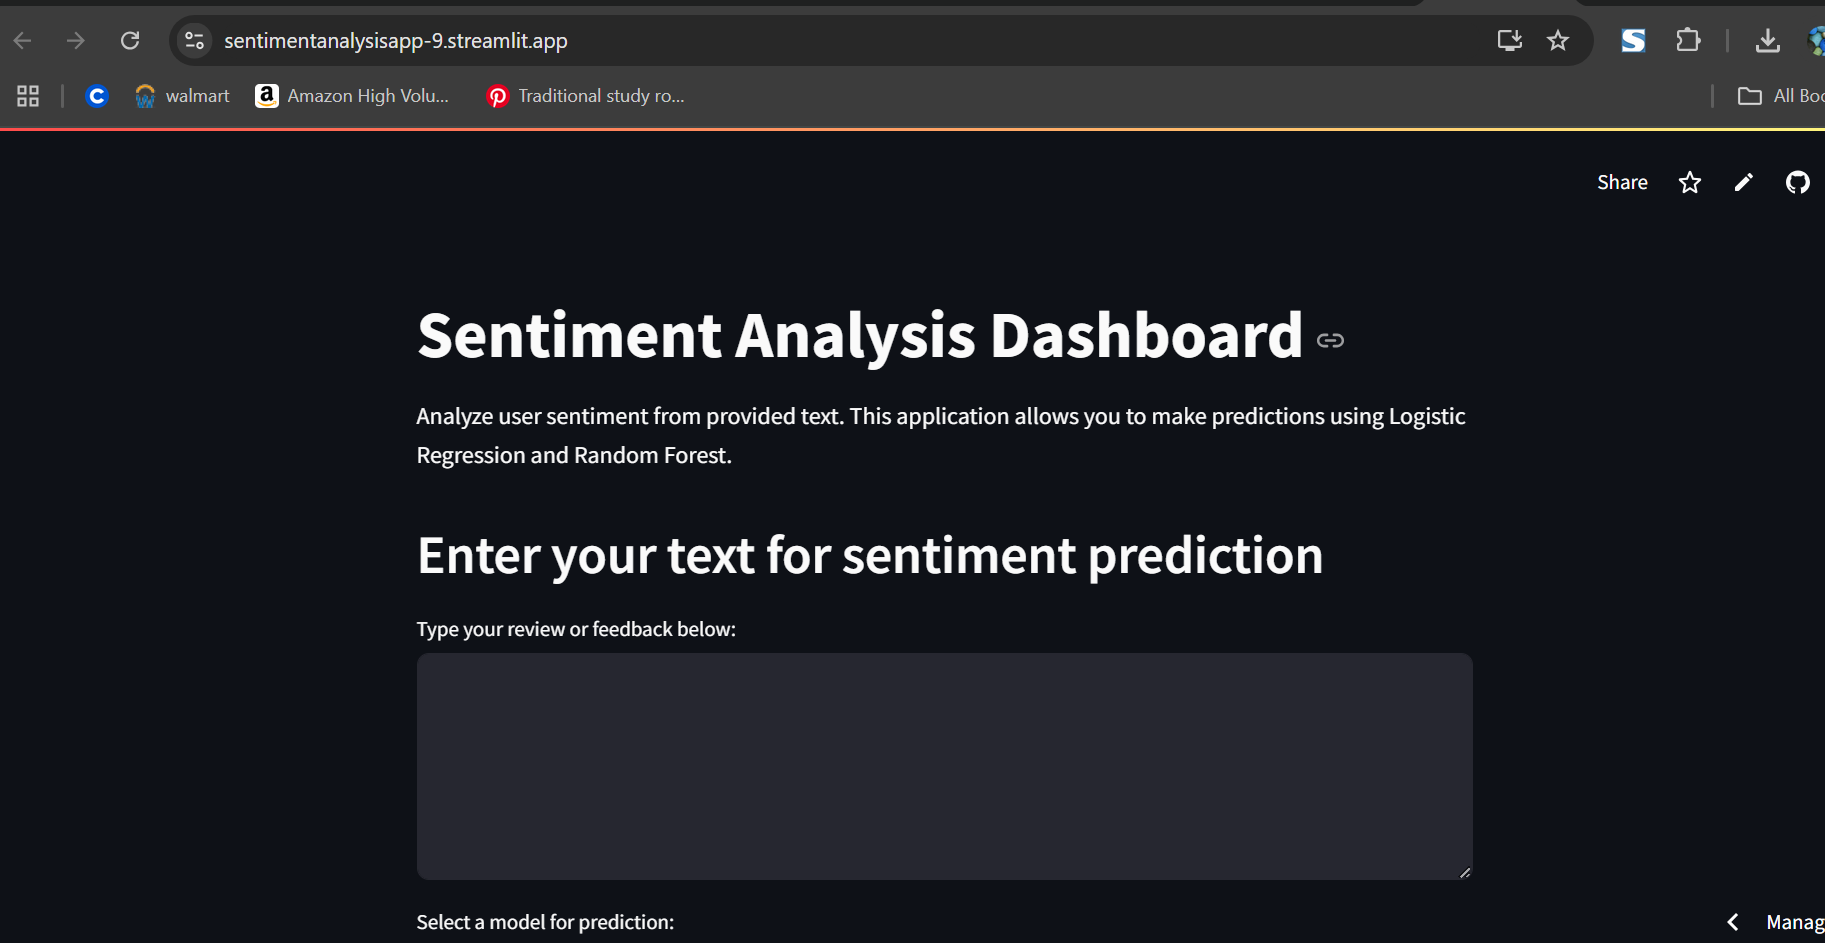

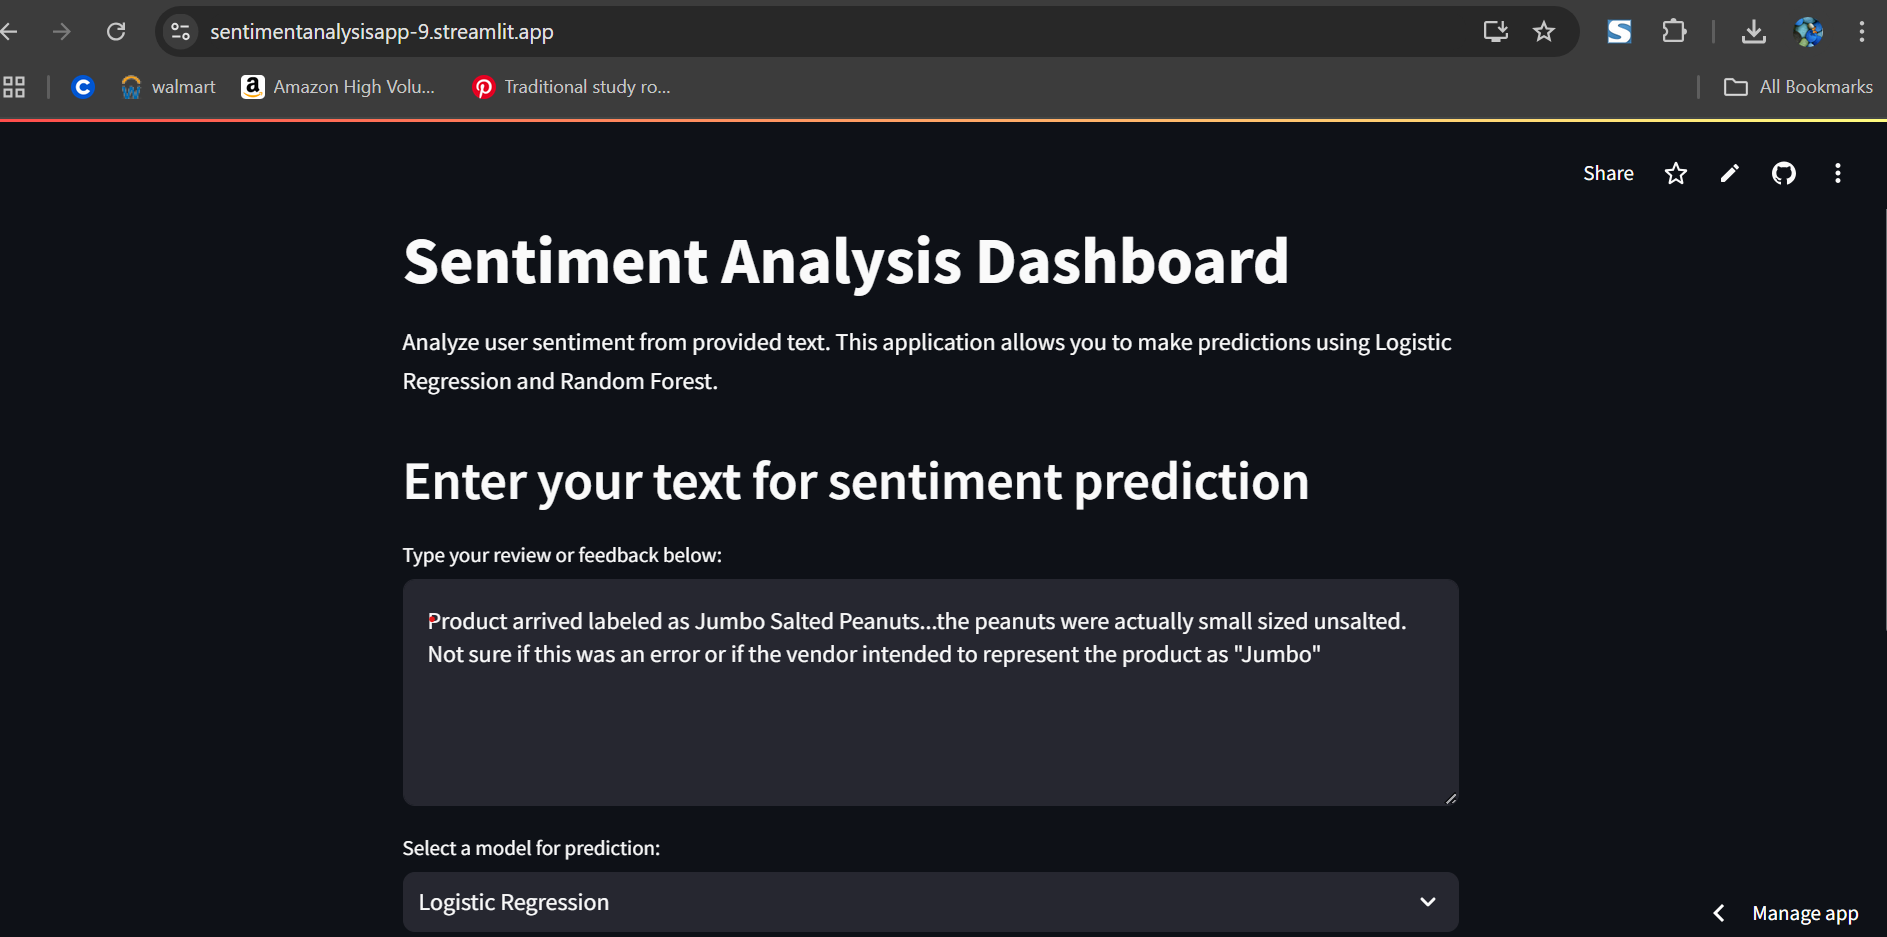

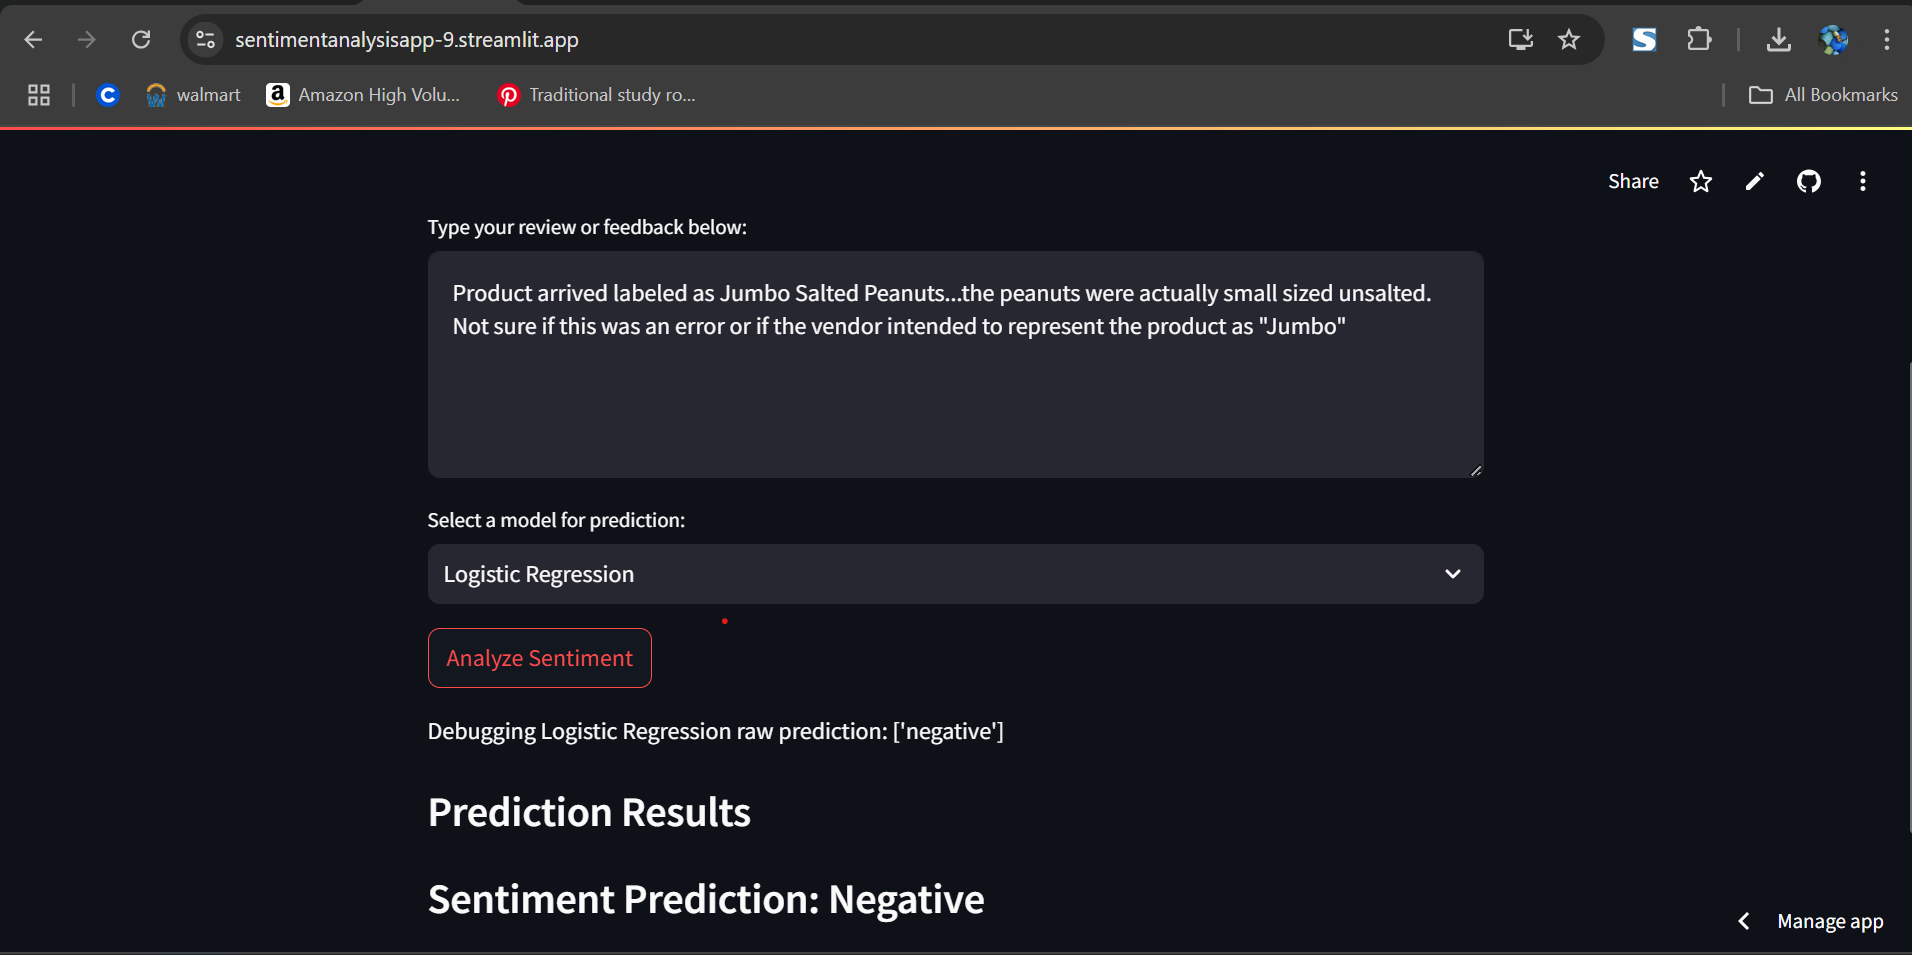

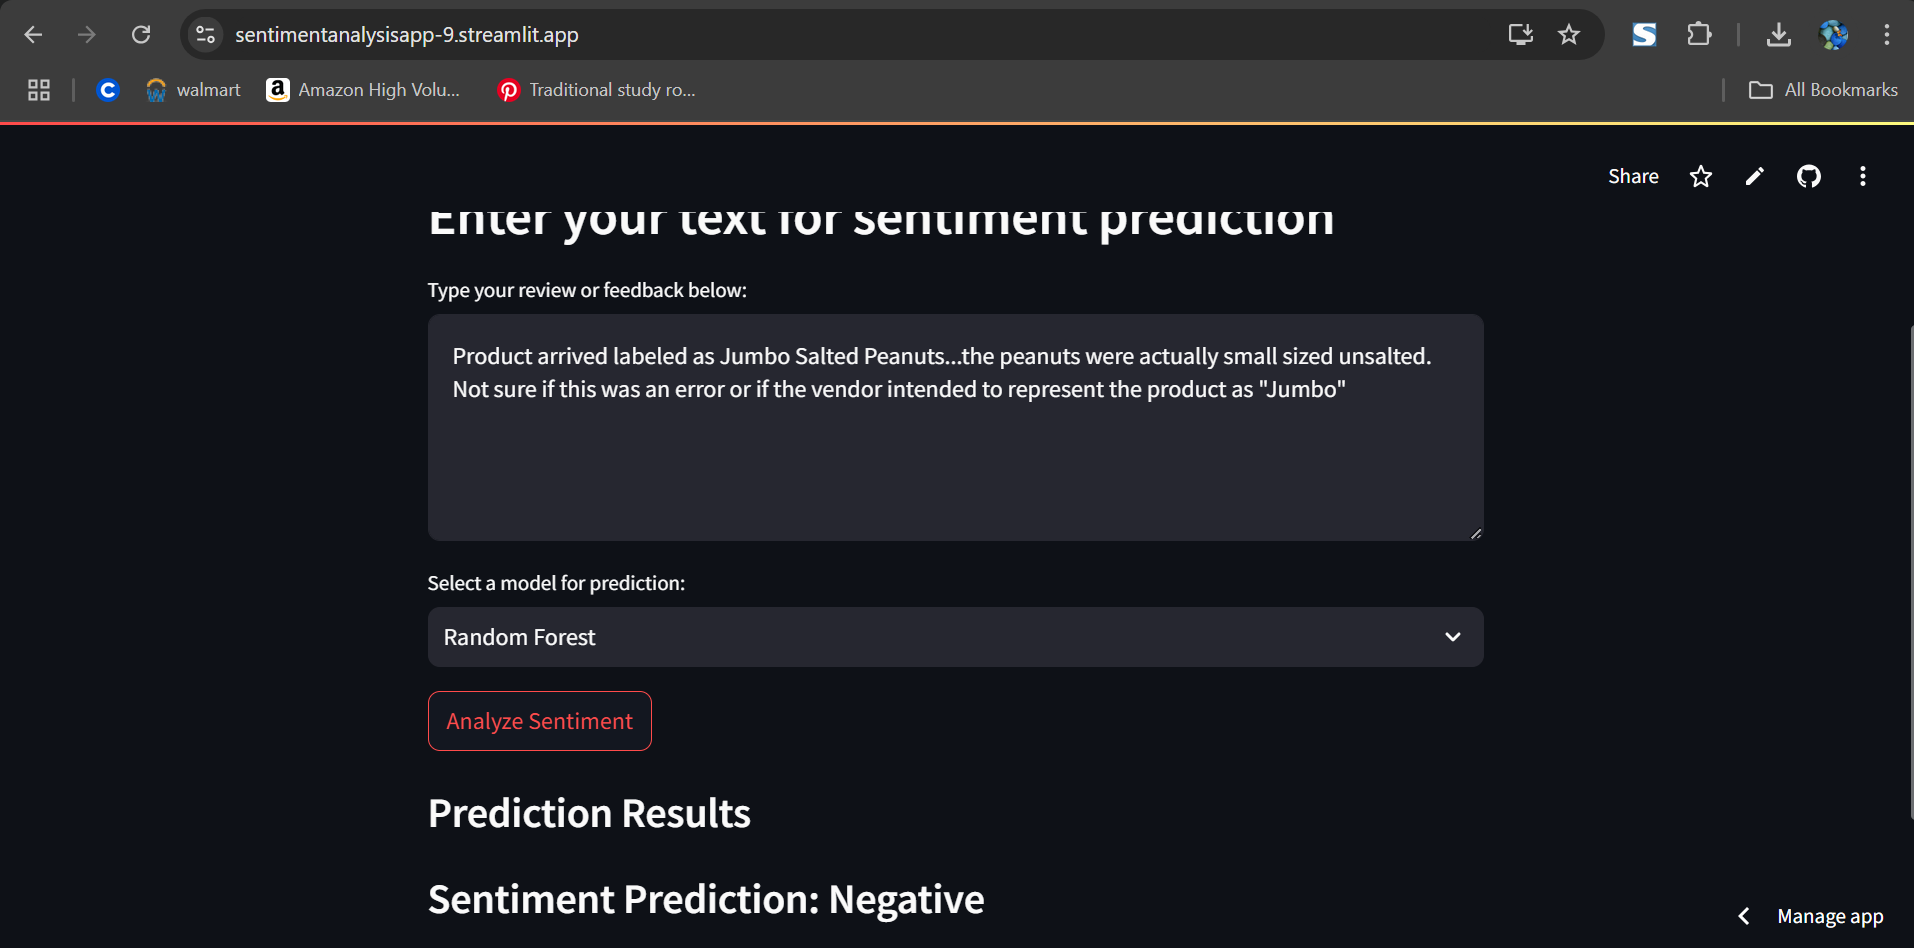